In [1]:
import numpy as np
from math import *
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [2]:
titanic = pd.read_csv('titanic_dirtied.csv')
titanic

,passenger age,Cabin,Location Embarked,FARE,Passenger Name,# of parents/children,PassengerId,Passenger Class,Sex,# of siblings/spouses,Survived,Ticket,Title,Family_Size
0,20.0,C14,NaN,NaN,"Pang, Mr. Joseph Guadalupe",NaN,NaN,NaN,MALE,NaN,no,NaN,Mr,NaN
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0.0,1.0,3.0,MALE,1.0,no,A/5 21171,Mr,1.0
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2.0,1.0,FEMALE,1.0,yes,PC 17599,Mrs,1.0
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0.0,3.0,3.0,FEMALE,0.0,yes,STON/O2. 3101282,Miss,0.0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4.0,1.0,FEMALE,1.0,yes,113803,Mrs,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0.0,887.0,2.0,MALE,0.0,no,211536,Rev,0.0
891,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0.0,888.0,1.0,FEMALE,0.0,yes,112053,Miss,0.0
892,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2.0,889.0,3.0,FEMALE,1.0,no,W./C. 6607,Miss,3.0
893,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0.0,890.0,1.0,MALE,0.0,yes,111369,Mr,0.0


## Cleaning the data

In [3]:
titanic.columns

Index(['passenger age', 'Cabin', 'Location Embarked', 'FARE', 'Passenger Name',
       '# of parents/children', 'PassengerId', 'Passenger Class', 'Sex',
       '# of siblings/spouses', 'Survived', 'Ticket', 'Title', 'Family_Size'],
      dtype='object')

In [4]:
def renum(survival):
    if survival == "no":
        return 0
    elif survival == "yes":
        return 1

In [5]:
titanic.drop(columns=['Cabin', 'Location Embarked', "# of parents/children", "# of siblings/spouses", 'PassengerId', 'Ticket', 'Title'], inplace=True)
titanic['Survived'] = titanic['Survived'].apply(renum)
titanic.dropna(inplace=True)
titanic['Sex'] = titanic['Sex'].apply(str.lower)
titanic.rename(columns={'FARE': 'Fare', 'passenger age': 'Age', 'Family_Size': 'Family Size', 'Passenger Name': 'Name', 'Passenger Class': 'Class'}, inplace=True)
titanic

,Age,Fare,Name,Class,Sex,Survived,Family Size
1,22.0,7.2500,"Braund, Mr. Owen Harris",3.0,male,0,1.0
2,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,female,1,1.0
3,26.0,7.9250,"Heikkinen, Miss. Laina",3.0,female,1,0.0
4,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,female,1,1.0
5,35.0,8.0500,"Allen, Mr. William Henry",3.0,male,0,0.0
...,...,...,...,...,...,...,...
890,27.0,13.0000,"Montvila, Rev. Juozas",2.0,male,0,0.0
891,19.0,30.0000,"Graham, Miss. Margaret Edith",1.0,female,1,0.0
892,22.0,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",3.0,female,0,3.0
893,26.0,30.0000,"Behr, Mr. Karl Howell",1.0,male,1,0.0


In [6]:
def rename(name):
    names = name.split(", ")
    return names[1]+' '+names[0]

In [7]:
titanic['Name'] = titanic['Name'].apply(rename)
titanic['Class'] = titanic['Class'].apply(int)
titanic

,Age,Fare,Name,Class,Sex,Survived,Family Size
1,22.0,7.2500,Mr. Owen Harris Braund,3,male,0,1.0
2,38.0,71.2833,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,female,1,1.0
3,26.0,7.9250,Miss. Laina Heikkinen,3,female,1,0.0
4,35.0,53.1000,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,female,1,1.0
5,35.0,8.0500,Mr. William Henry Allen,3,male,0,0.0
...,...,...,...,...,...,...,...
890,27.0,13.0000,Rev. Juozas Montvila,2,male,0,0.0
891,19.0,30.0000,Miss. Margaret Edith Graham,1,female,1,0.0
892,22.0,23.4500,"Miss. Catherine Helen ""Carrie"" Johnston",3,female,0,3.0
893,26.0,30.0000,Mr. Karl Howell Behr,1,male,1,0.0


## Exploratory Data Analysis

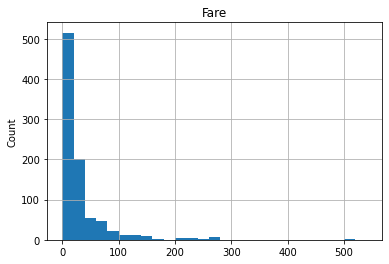

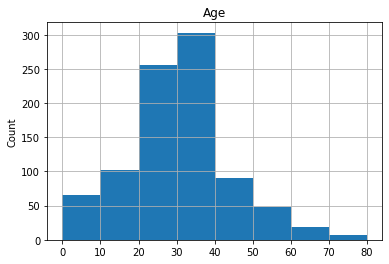

In [8]:
titanic.hist("Fare", bins=np.arange(0, 550, 20))
plt.ylabel('Count')
plt.show()
titanic.hist('Age', bins=np.arange(0, 81, 10))
plt.ylabel('Count')
plt.show()
# distribution of fare and age variables

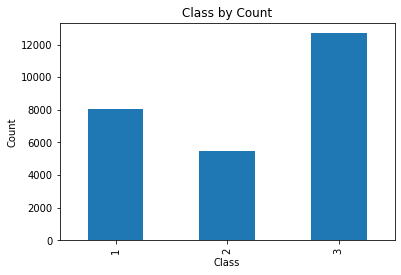

In [9]:
titanic.groupby('Class').sum()['Age'].plot(kind='bar')
plt.title('Class by Count')
plt.ylabel('Count')
plt.show()

In [10]:
mean_vars = titanic.groupby('Class').mean()
mean_vars

,Age,Fare,Survived,Family Size
Class,,,,
1,37.344537,84.154687,0.629630,0.773148
2,29.797989,20.662183,0.472826,0.782609
3,25.837923,13.675550,0.242363,1.008147


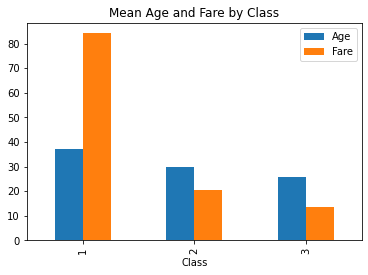

In [11]:
mean_vars[['Age', 'Fare']].plot(kind='bar')
plt.title('Mean Age and Fare by Class')
plt.show()

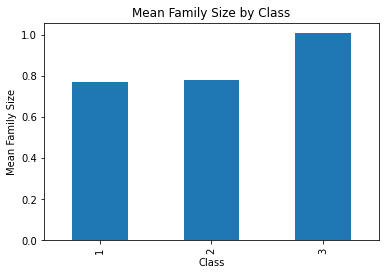

In [12]:
mean_vars['Family Size'].plot(kind='bar')
plt.title('Mean Family Size by Class')
plt.ylabel('Mean Family Size')
plt.show()

In [13]:
sum_vars = titanic.groupby('Class').sum()
sum_vars

,Age,Fare,Survived,Family Size
Class,,,,
1,8066.42,18177.4125,136,167.0
2,5482.83,3801.8417,87,144.0
3,12686.42,6714.6951,119,495.0


In [14]:
survival_class = pd.concat([sum_vars['Survived'].to_frame(), titanic.groupby('Class').count()['Age'].to_frame()], axis=1).rename(columns={
    'Age': 'Total'
})
survival_class['Percentage'] = survival_class['Survived']/survival_class['Total']
survival_class

,Survived,Total,Percentage
Class,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


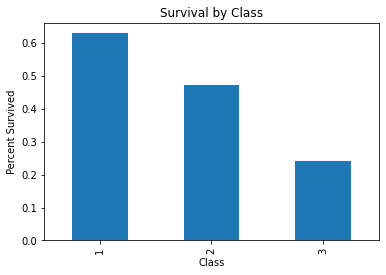

In [15]:
survival_class['Percentage'].plot(kind='bar')
plt.title('Survival by Class')
plt.ylabel('Percent Survived')
plt.show()

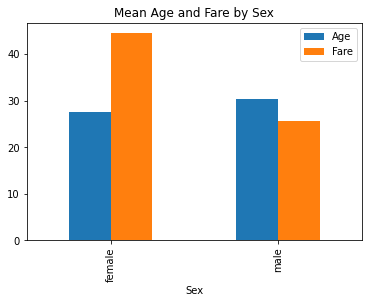

In [16]:
titanic.groupby('Sex').mean()[['Age', 'Fare']].plot(kind='bar')
plt.title('Mean Age and Fare by Sex')
plt.show()

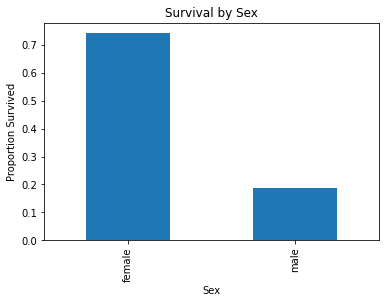

In [17]:
sum_sex = titanic.groupby('Sex').sum()
survival_sex = pd.concat([sum_sex['Survived'].to_frame(), titanic.groupby('Sex').count()['Age'].to_frame()], axis=1).rename(columns={
    'Age': 'Total'
})
survival_sex['Percentage'] = survival_sex['Survived']/survival_sex['Total']
survival_sex['Percentage'].plot(kind='bar')
plt.title('Survival by Sex')
plt.ylabel('Proportion Survived')
plt.show()

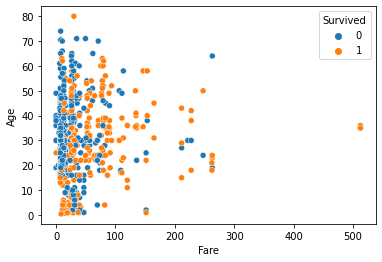

In [18]:
sns.scatterplot(x='Fare', y='Age', data=titanic, hue='Survived');

## A/B Testing

In [19]:
titanic_selected = titanic[['Sex', 'Survived']]

In [20]:
def test_stat(df):
    survive_count = df.loc[df['Survived'] == 1].groupby('Sex').count()
    prop_females = int(survive_count[0:1]['Survived']) / len(df.loc[df['Sex'] == 'female'])
    prop_males = int(survive_count[1:2]['Survived']) / len(df.loc[df['Sex'] == 'male'])
    return abs(prop_females - prop_males)

observed_stat = test_stat(titanic_selected)
observed_stat

0.5531300709799203

In [21]:
differences = []
sims = 10000
for i in range(sims):
    sim = titanic_selected
    sim['Survived'] = np.random.permutation(sim['Survived'].values)
    differences.append(test_stat(sim))

In [22]:
differences

[0.01241872633542701,
 0.022254357593085305,
 0.04192562010840173,
 0.036759429952864076,
 0.01241872633542701,
 0.05176125136605991,
 0.026923798695205836,
 0.026923798695205836,
 0.017336541964256158,
 0.03208998885074349,
 0.01241872633542701,
 0.06626632372583868,
 0.03208998885074349,
 0.100939407654351,
 0.026923798695205836,
 0.017336541964256158,
 0.06626632372583868,
 0.022005983066376744,
 0.012170351808718505,
 0.022005983066376744,
 0.017336541964256158,
 0.04192562010840173,
 0.022005983066376744,
 0.012170351808718505,
 0.012170351808718505,
 0.07610195498349692,
 0.012170351808718505,
 0.07118413935466777,
 0.0564306924681805,
 0.022254357593085305,
 0.012170351808718505,
 0.007500910706597919,
 0.012170351808718505,
 0.027172173221914397,
 0.022005983066376744,
 0.04192562010840173,
 0.027172173221914397,
 0.04659506121052226,
 0.01241872633542701,
 0.026923798695205836,
 0.03208998885074349,
 0.026923798695205836,
 0.03184161432403493,
 0.03184161432403493,
 0.05176125

In [23]:
p_value = np.count_nonzero(differences > np.array(observed_stat)) / sims
p_value

0.0

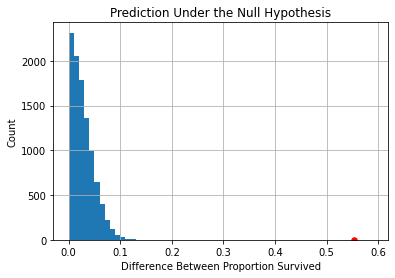

Observed Difference: 0.5531300709799203
Empirical P-value: 0.0


In [24]:
pd.DataFrame({'Differences': differences}).hist(bins=np.arange(0,.6,.01))
plt.xlabel('Difference Between Proportion Survived')
plt.ylabel('Count')
plt.scatter(observed_stat, 1, color='red', s=30)
plt.title('Prediction Under the Null Hypothesis')
plt.show()
print('Observed Difference:', observed_stat)
print('Empirical P-value:', p_value)

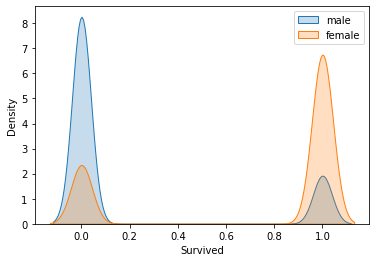

In [25]:
sns.kdeplot(titanic.loc[titanic["Sex"] == "male"]["Survived"], label = "male", shade=True, bw_method = 0.1);
sns.kdeplot(titanic.loc[titanic["Sex"] == "female"]["Survived"], label = "female", shade=True, bw_method = 0.1);
plt.legend()
plt.show()

## Regression

In [26]:
def sex(s):
    if s == 'female':
        return 1
    elif s == 'male':
        return 0

In [27]:
# splitting
from sklearn.linear_model import *
from sklearn.model_selection import *
titanicreg = titanic
titanicreg['Sex'] = titanicreg['Sex'].apply(sex)

In [28]:
titanicreg

,Age,Fare,Name,Class,Sex,Survived,Family Size
1,22.0,7.2500,Mr. Owen Harris Braund,3,0,0,1.0
2,38.0,71.2833,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,1,1,1.0
3,26.0,7.9250,Miss. Laina Heikkinen,3,1,1,0.0
4,35.0,53.1000,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,1,1.0
5,35.0,8.0500,Mr. William Henry Allen,3,0,0,0.0
...,...,...,...,...,...,...,...
890,27.0,13.0000,Rev. Juozas Montvila,2,0,0,0.0
891,19.0,30.0000,Miss. Margaret Edith Graham,1,1,1,0.0
892,22.0,23.4500,"Miss. Catherine Helen ""Carrie"" Johnston",3,1,0,3.0
893,26.0,30.0000,Mr. Karl Howell Behr,1,0,1,0.0


In [29]:
X = titanicreg[['Age', 'Fare', 'Class', 'Sex']] # 4 inputs
y = titanicreg['Survived']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
y_predicts = lr.predict(X_test)

In [34]:
np.array(y_test)

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0])

In [35]:
correct = 0
for i, surv in enumerate(np.array(y_test)):
    if surv == round(y_predicts[i]):
        correct+=1
correct/len(y_predicts)

0.752542372881356

In [36]:
print('The linear regression model predicted the survival correctly '+str(round(100*correct/len(y_predicts)))+'% of the time')

The linear regression model predicted the survival correctly 75% of the time


In [37]:
logr = LogisticRegression()

In [38]:
logr.fit(X_train, y_train)

LogisticRegression()

In [39]:
log_predicts = logr.predict(X_test)
score = logr.score(X_test, y_test)
print('The logistic regression model predicted the survival correctly '+str(round(100*score))+'% of the time')

The logistic regression model predicted the survival correctly 77% of the time


In [40]:
from sklearn.metrics import *

In [41]:
cm = confusion_matrix(np.array(y_test), log_predicts)
cm

array([[145,  33],
       [ 36,  81]])

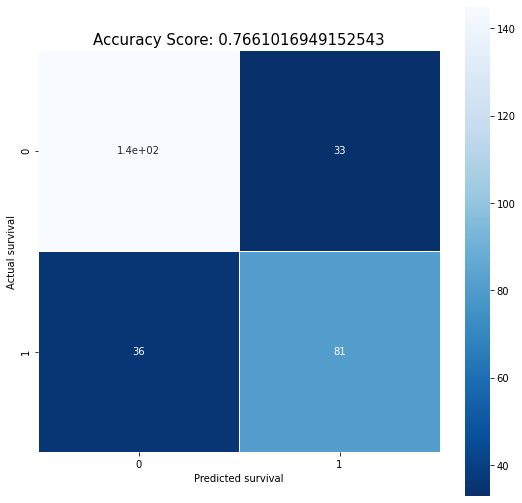

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual survival');
plt.xlabel('Predicted survival');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);